# California
## Contents
- [Imports](#Imports)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)

# Imports

In [1]:
# Import the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm  import SVR, SVC
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, PowerTransformer, OneHotEncoder, QuantileTransformer
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, ExtraTreesRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.ensemble import VotingRegressor

from sklearn.metrics import mean_squared_error
from sklearn.compose import make_column_selector, make_column_transformer

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, ExtraTreesClassifier 
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import VotingClassifier

In [2]:
# Import the data.
df = pd.read_csv('../data/cleaned_engineered_ca.csv')

In [3]:
df.head(2)

county_state  total_cases  total_fatalities  death_rate  \
0  Santa Clara County, California      23978.0             388.0    0.016181   
1    San Mateo County, California      10942.0             159.0    0.014531   

   total_tests  race_pop  race_pop_hispanic_or_latino_of_any_race  \
0       839764   1922200                                   495455   
1       285657    765935                                   189002   

   race_pop_white_alone  race_pop_black_or_african_american_alone  \
0                615912                                     45379   
1                303047                                     16838   

   race_pop_american_indian_and_alaska_native_alone  ...  \
0                                              3003  ...   
1                                              1151  ...   

   percent_race_pop_other  percent_race_pop_minority  \
0                0.041717                   0.679580   
1                0.058196                   0.604344   

   percent_sex_age_pop_0_to_44  percent_sex_age_pop_45_to_74  \
0                     0.616108                      0.327238   
1                     0.574618                      0.357939   

   percent_sex_age_pop_75_and_over  percent_sex_age_pop_0_to_64  \
0                         0.056655                     0.871549   
1                         0.067443                     0.846114   

   percent_sex_age_pop_65_and_over  percent_sex_age_pop_0_to_35  \
0                         0.128451                     0.469933   
1                         0.153886                     0.430888   

   percent_sex_age_pop_35_to_59  percent_sex_age_pop_60_to_84  
0                      0.348772                      0.163722  
1                      0.353295                      0.192727  

[2 rows x 126 columns]

# Exploratory Data Analysis

## Correlations

In [4]:
# Extract the columns with percentages, save to a new dataframe.
df_percent = df.filter(regex = 'percent', axis = 1)

In [5]:
# Other metrics from the original dataframe to carry over.
# These were not total counts and thus not calculated in percentage step.
df_temp = df[[
    'county_state',
    'total_cases',
    'total_fatalities',
    'death_rate',
    'total_tests',
    'sex_age_median_age_in_years', 
    'inc_med_hhld_inc_dol',
    'inc_mean_hhld_inc_dol',
    'inc_per_capita_inc_dol',
    'inc_med_earn_male_full_yr_workers_dol',
    'inc_med_earn_female_full_yr_workers_dol',
    'deaths_per_100_cases',
    'cases_per_100_people',
    'tests_per_100_people',
    'pop_density',
    'covid_severity'
]]

In [6]:
# Concatenate the two dataframes to get a complete feature set.
df_percent = pd.concat([df_temp, df_percent], axis=1)

### Correlations for 'cases_per_100_people'

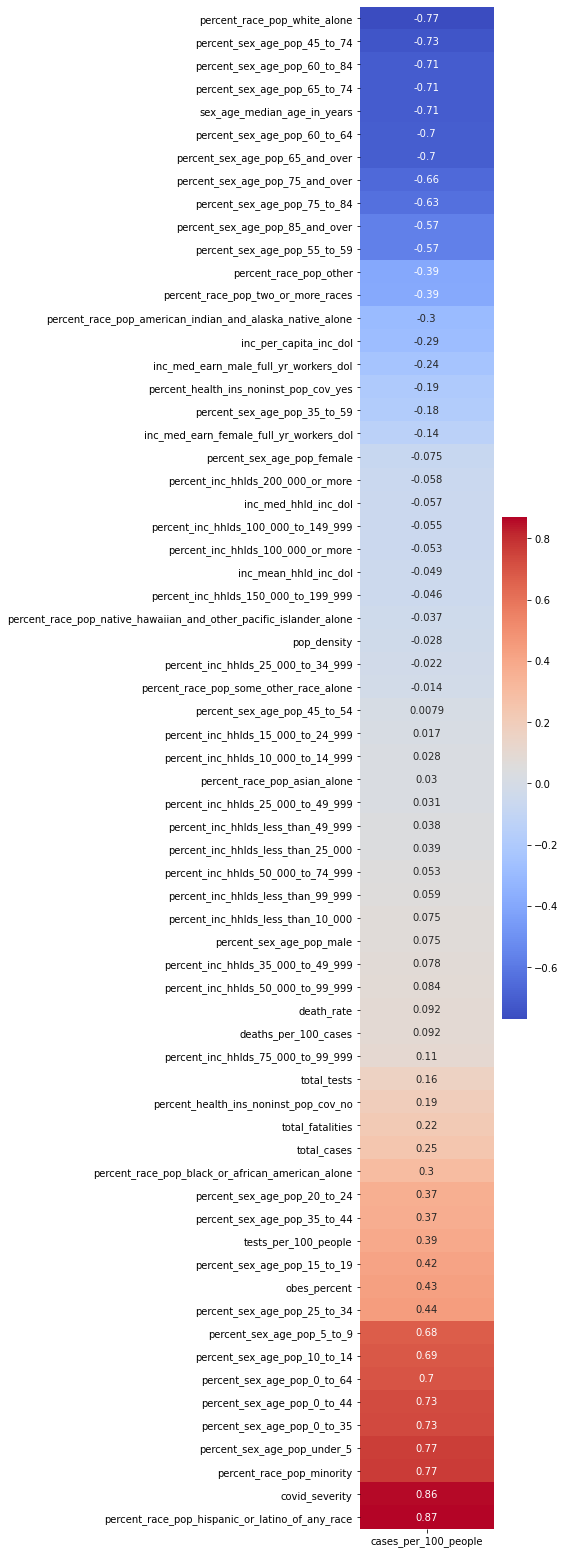

In [7]:
# Visualize the correlation between the variables and 'cases_per_100_people'.
# Save a correlation table to a variable.
corr = df_percent.corr()

# Display a correlation chart just for Sale Price.
plt.figure(figsize=(3, 28))
sns.heatmap(corr[['cases_per_100_people']].sort_values(by='cases_per_100_people').iloc[:-1], annot=True, cmap = 'coolwarm');

### Correlations for 'covid_severity'

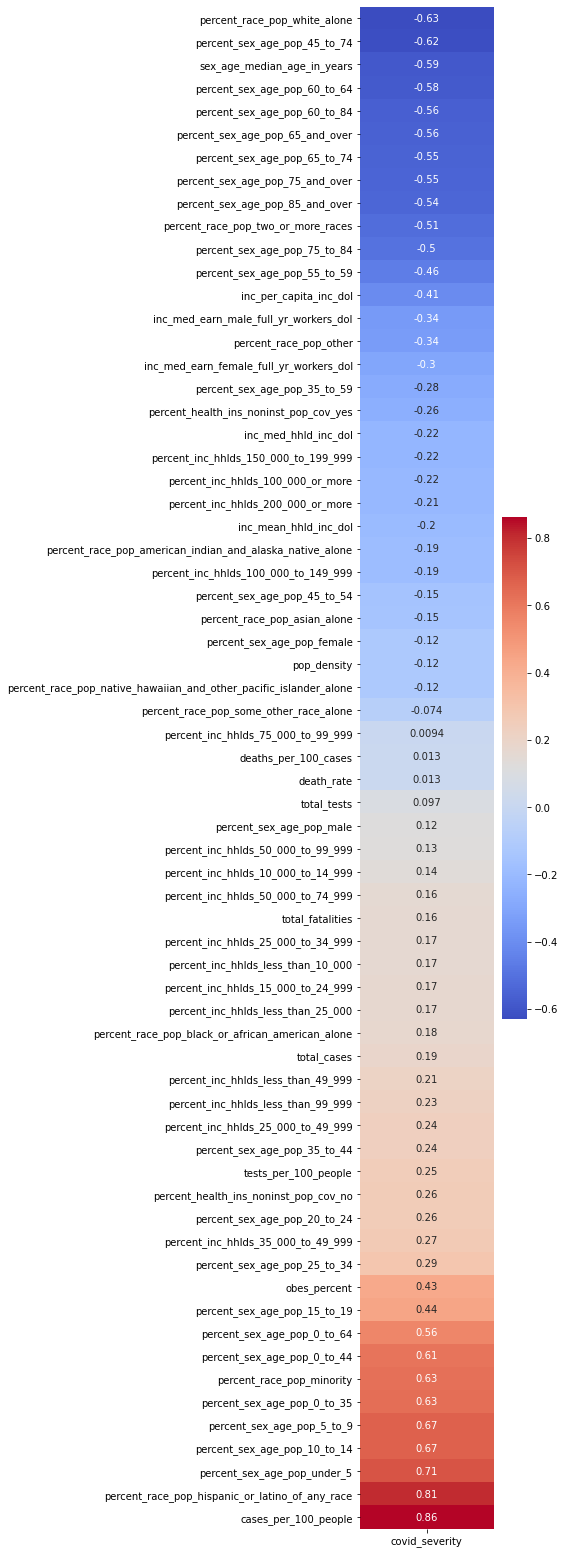

In [8]:
# Visualize the correlation between the variables and 'cases_per_100_people'.
# Save a correlation table to a variable.
corr = df_percent.corr()

# Display a correlation chart just for Sale Price.
plt.figure(figsize=(3, 28))
sns.heatmap(corr[['covid_severity']].sort_values(by='covid_severity').iloc[:-1], annot=True, cmap = 'coolwarm');

## Visualizing Distributions

In [9]:
# Define a custom function to help subplot histograms.
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels, 
                       list_of_ylabels, figsize, bins, ncols, hspace):
    plt.style.use('seaborn-whitegrid')
    nrows = int(np.ceil(len(list_of_columns)/ncols))
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize) 
    ax = ax.ravel()
    for i, column in enumerate(list_of_columns):
        ax[i].hist(dataframe[column], bins=bins)
        # Set title for each subplot
        ax[i].set_title(list_of_titles[i], fontsize=14)        
        # Set xlabel for each subplot
        ax[i].set_xlabel(list_of_xlabels[i], fontsize=12)
        # Set ylabel for each subplot
        ax[i].set_ylabel(list_of_ylabels[i], fontsize=12)
        plt.subplots_adjust(hspace=hspace);

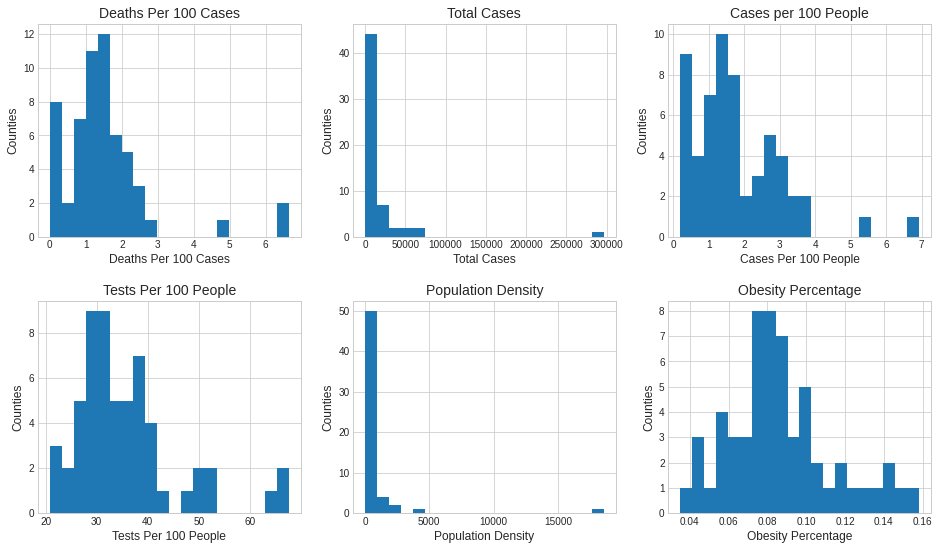

In [10]:
subplot_histograms(
    df,
    ['deaths_per_100_cases', 'total_cases', 'cases_per_100_people', 
     'tests_per_100_people', 'pop_density', 'obes_percent'],
    ['Deaths Per 100 Cases', 'Total Cases', 'Cases per 100 People', 
     'Tests Per 100 People', 'Population Density', 'Obesity Percentage'],
    ['Deaths Per 100 Cases', 'Total Cases', 'Cases Per 100 People', 
     'Tests Per 100 People', 'Population Density', 'Obesity Percentage'],
    ['Counties', 'Counties', 'Counties', 'Counties', 'Counties', 'Counties'],
    figsize=(16,9),
    bins=20,
    ncols=3,
    hspace=.3
)

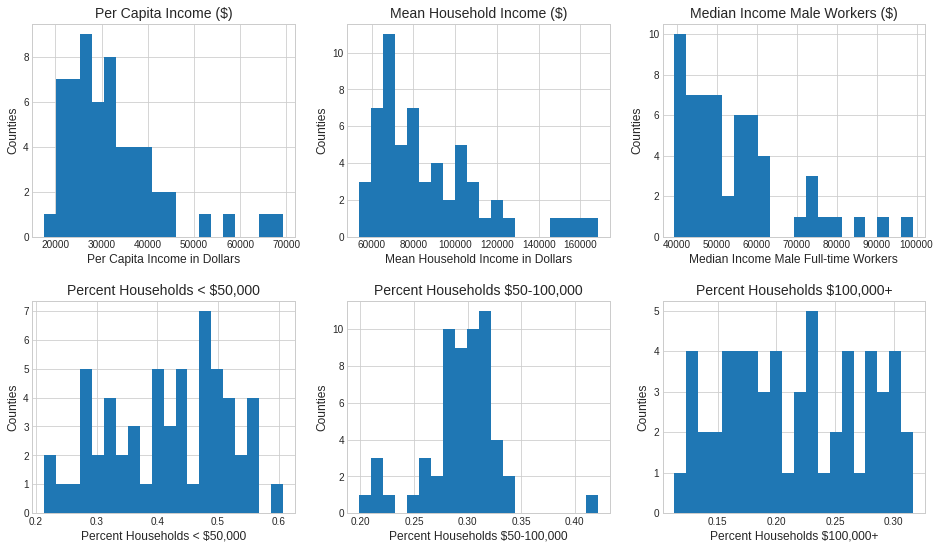

In [11]:
subplot_histograms(
    df,
    ['inc_per_capita_inc_dol', 'inc_mean_hhld_inc_dol', 'inc_med_earn_male_full_yr_workers_dol', 
     'percent_inc_hhlds_less_than_49_999', 'percent_inc_hhlds_50_000_to_99_999', 'percent_inc_hhlds_100_000_or_more'],
    ['Per Capita Income ($)', 'Mean Household Income ($)', 'Median Income Male Workers ($)', 
     'Percent Households < $50,000', 'Percent Households $50-100,000', 'Percent Households $100,000+'],
    ['Per Capita Income in Dollars', 'Mean Household Income in Dollars', 'Median Income Male Full-time Workers', 
     'Percent Households < $50,000', 'Percent Households $50-100,000', 'Percent Households $100,000+'],
    ['Counties', 'Counties', 'Counties', 'Counties', 'Counties', 'Counties'],
    figsize=(16,9),
    bins=20,
    ncols=3,
    hspace=.3
)

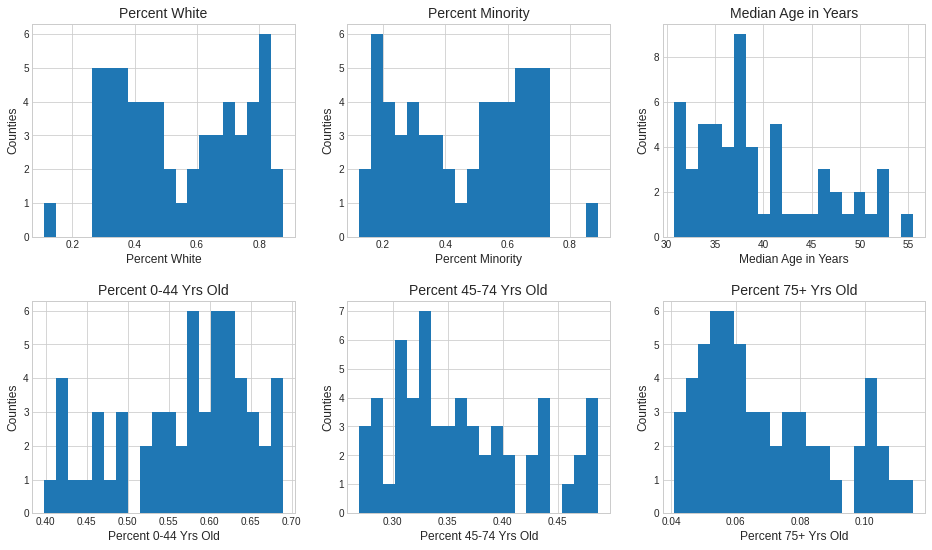

In [12]:
subplot_histograms(
    df,
    ['percent_race_pop_white_alone', 'percent_race_pop_minority', 'sex_age_median_age_in_years', 
     'percent_sex_age_pop_0_to_44', 'percent_sex_age_pop_45_to_74', 'percent_sex_age_pop_75_and_over'],
    ['Percent White', 'Percent Minority', 'Median Age in Years', 'Percent 0-44 Yrs Old', 
     'Percent 45-74 Yrs Old', 'Percent 75+ Yrs Old'],
    ['Percent White', 'Percent Minority', 'Median Age in Years', 'Percent 0-44 Yrs Old',
     'Percent 45-74 Yrs Old', 'Percent 75+ Yrs Old'],
    ['Counties', 'Counties', 'Counties', 'Counties', 'Counties', 'Counties'],
    figsize=(16,9),
    bins=20,
    ncols=3,
    hspace=.3
)

## Plotting variables against 'cases_per_100_people'

In [13]:
# Define a function to help subplot scatterplots.
def subplot_scatter(dataframe, list_of_xcolumns, list_of_ycolumns, list_of_titles, 
                    list_of_xlabels, list_of_ylabels, figsize, s, ncols, hspace):
    plt.style.use('seaborn-whitegrid')
    nrows = int(np.ceil(len(list_of_xcolumns)/ncols)) 
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize) 
    ax = ax.ravel() 
    for i, xcolumn in enumerate(list_of_xcolumns): 
        ax[i].scatter(dataframe[xcolumn], dataframe[list_of_ycolumns[i]], s=s)
        # Set title for each subplot
        ax[i].set_title(list_of_titles[i], fontsize=14)
        # Set xlabel for each subplot
        ax[i].set_xlabel(list_of_xlabels[i], fontsize=12)
        # Set ylabel for each subplot
        ax[i].set_ylabel(list_of_ylabels[i], fontsize=12)
        plt.subplots_adjust(hspace=hspace);

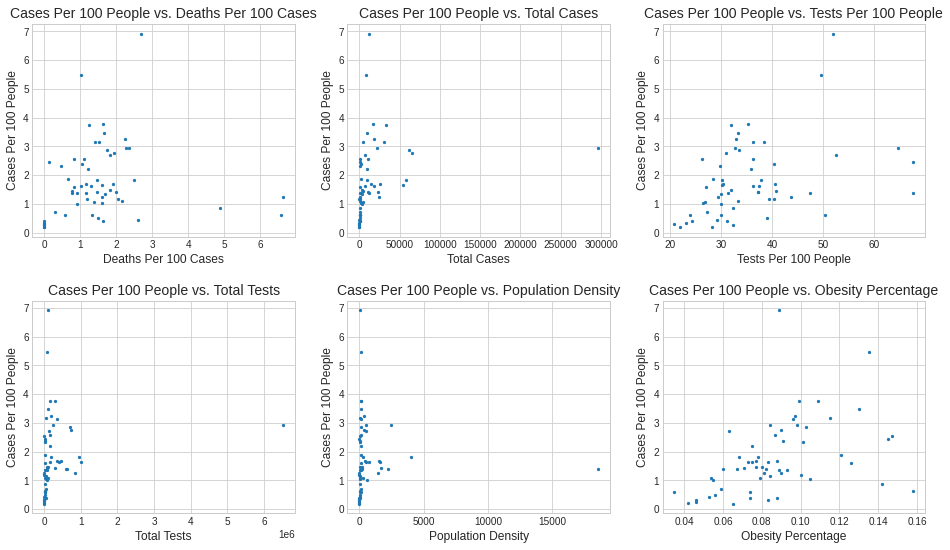

In [14]:
# Plot features of interest against cases_per_100_people.
subplot_scatter(
    df,
    list_of_xcolumns=[
        'deaths_per_100_cases', 'total_cases', 'tests_per_100_people', 
        'total_tests', 'pop_density', 'obes_percent'],
    list_of_ycolumns=[
        'cases_per_100_people', 'cases_per_100_people', 'cases_per_100_people', 
        'cases_per_100_people', 'cases_per_100_people', 'cases_per_100_people'],
    list_of_titles=[
        'Cases Per 100 People vs. Deaths Per 100 Cases',
        'Cases Per 100 People vs. Total Cases',
        'Cases Per 100 People vs. Tests Per 100 People',
        'Cases Per 100 People vs. Total Tests',
        'Cases Per 100 People vs. Population Density',
        'Cases Per 100 People vs. Obesity Percentage'],
    list_of_xlabels=[
        'Deaths Per 100 Cases', 'Total Cases', 'Tests Per 100 People',
        'Total Tests', 'Population Density', 'Obesity Percentage'],
    list_of_ylabels=[
        'Cases Per 100 People', 'Cases Per 100 People', 'Cases Per 100 People',
        'Cases Per 100 People', 'Cases Per 100 People', 'Cases Per 100 People'],
    figsize=(16,9), s=5, ncols=3, hspace=.3)

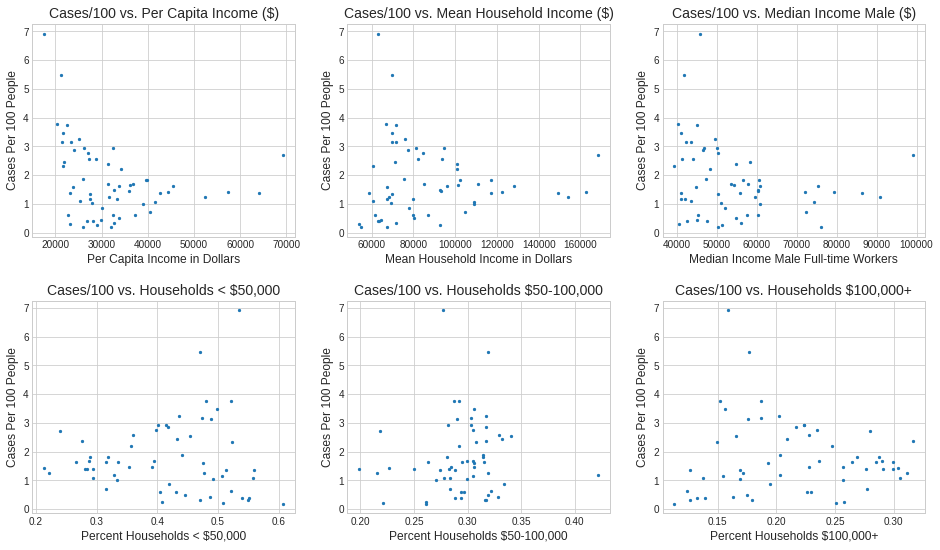

In [15]:
# Plot features of interest against cases_per_100_people.
subplot_scatter(
    df,
    list_of_xcolumns=[
        'inc_per_capita_inc_dol', 'inc_mean_hhld_inc_dol', 'inc_med_earn_male_full_yr_workers_dol', 
        'percent_inc_hhlds_less_than_49_999', 'percent_inc_hhlds_50_000_to_99_999', 'percent_inc_hhlds_100_000_or_more'],
    list_of_ycolumns=[
        'cases_per_100_people', 'cases_per_100_people', 'cases_per_100_people', 
        'cases_per_100_people', 'cases_per_100_people', 'cases_per_100_people'],
    list_of_titles=[
        'Cases/100 vs. Per Capita Income ($)', 'Cases/100 vs. Mean Household Income ($)',
        'Cases/100 vs. Median Income Male ($)', 'Cases/100 vs. Households < $50,000',
        'Cases/100 vs. Households $50-100,000', 'Cases/100 vs. Households $100,000+'],
    list_of_xlabels=[
        'Per Capita Income in Dollars', 'Mean Household Income in Dollars', 'Median Income Male Full-time Workers', 
        'Percent Households < $50,000', 'Percent Households $50-100,000', 'Percent Households $100,000+'],
    list_of_ylabels=[
        'Cases Per 100 People', 'Cases Per 100 People', 'Cases Per 100 People',
        'Cases Per 100 People', 'Cases Per 100 People', 'Cases Per 100 People'],
    figsize=(16,9), s=5, ncols=3, hspace=.3)

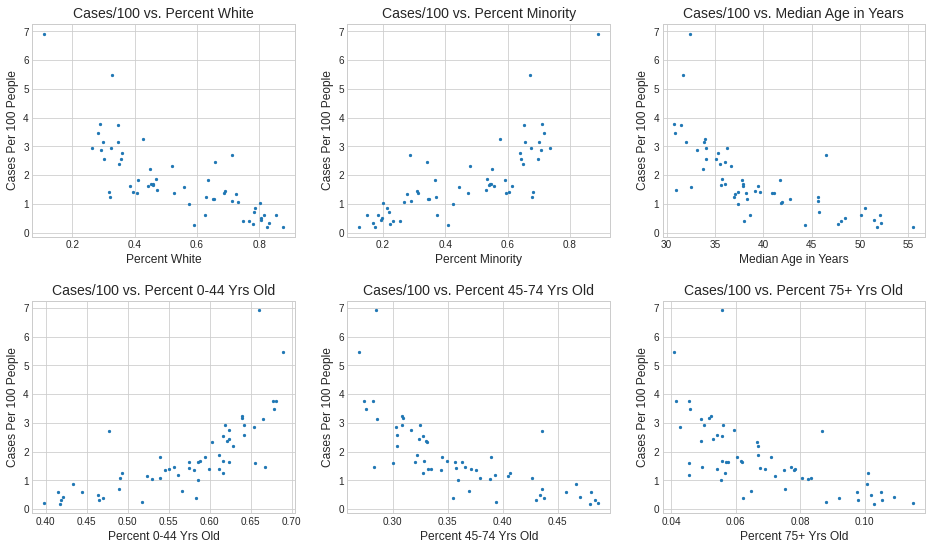

In [16]:
# Plot features of interest against cases_per_100_people.
subplot_scatter(
    df,
    list_of_xcolumns=[
        'percent_race_pop_white_alone', 'percent_race_pop_minority', 'sex_age_median_age_in_years', 
        'percent_sex_age_pop_0_to_44', 'percent_sex_age_pop_45_to_74', 'percent_sex_age_pop_75_and_over'],
    list_of_ycolumns=[
        'cases_per_100_people', 'cases_per_100_people', 'cases_per_100_people', 
        'cases_per_100_people', 'cases_per_100_people', 'cases_per_100_people'],
    list_of_titles=[
        'Cases/100 vs. Percent White', 'Cases/100 vs. Percent Minority',
        'Cases/100 vs. Median Age in Years', 'Cases/100 vs. Percent 0-44 Yrs Old',
        'Cases/100 vs. Percent 45-74 Yrs Old', 'Cases/100 vs. Percent 75+ Yrs Old'],
    list_of_xlabels=[
        'Percent White', 'Percent Minority', 'Median Age in Years', 
        'Percent 0-44 Yrs Old', 'Percent 45-74 Yrs Old', 'Percent 75+ Yrs Old'],
    list_of_ylabels=[
        'Cases Per 100 People', 'Cases Per 100 People', 'Cases Per 100 People',
        'Cases Per 100 People', 'Cases Per 100 People', 'Cases Per 100 People'],
    figsize=(16,9), s=5, ncols=3, hspace=.3)

# Regression Model: GridSearchCV with Quantile, SelectKBest, Ridge (BEST)

In [61]:
# Assign our features to X.
X = df[[
    'percent_race_pop_hispanic_or_latino_of_any_race',
    'percent_sex_age_pop_under_5',
    'percent_sex_age_pop_5_to_9',
    'percent_sex_age_pop_10_to_14',
    'percent_sex_age_pop_15_to_19',
    'obes_percent',
    'percent_sex_age_pop_25_to_34',
    'percent_inc_hhlds_35_000_to_49_999',
    'sex_age_pop_20_to_24',
    'percent_sex_age_pop_male',
    'percent_health_ins_noninst_pop_cov_no',
    'tests_per_100_people',
    'percent_sex_age_pop_35_to_44',
    'percent_race_pop_white_alone',    
    'percent_sex_age_pop_45_to_74',
    'percent_sex_age_pop_75_and_over',
    'percent_race_pop_two_or_more_races',
    'inc_per_capita_inc_dol',
    'pop_density'
]]

y = df['cases_per_100_people']

# Split X and y into train/test groups.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [62]:
# Display the shape of the training data.
X_train.shape

(43, 19)

In [63]:
X_test.shape

(15, 19)

In [64]:
# Create a main pipeline that will contain the dtype pipelines and the estimator.
pipe = make_pipeline(QuantileTransformer(), SelectKBest(f_regression), Ridge(max_iter=20_000))

# Set parameters for GridSearchCV.
params = {
    'selectkbest__k': range(1,300),
    'ridge__alpha': [.1, 1, 10, 20, 30]
}

# Set up GridSearchCV with the pipe and R2 as the scoring method.
gs = GridSearchCV(pipe, param_grid=params, scoring='r2', cv=10, n_jobs=-1)

In [65]:
# Call fit on the GridSearchCV object and pass the training  data.
gs.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('quantiletransformer',
                                        QuantileTransformer()),
                                       ('selectkbest',
                                        SelectKBest(score_func=<function f_regression at 0x7f3cea078290>)),
                                       ('ridge', Ridge(max_iter=20000))]),
             n_jobs=-1,
             param_grid={'ridge__alpha': [0.1, 1, 10, 20, 30],
                         'selectkbest__k': range(1, 300)},
             scoring='r2')

In [66]:
# Display the best parameters.
gs.best_params_

{'ridge__alpha': 1, 'selectkbest__k': 15}

In [67]:
# Display the score for the test set.
gs.score(X_test, y_test)

0.6803632096961685

In [68]:
# Display the score for the train set.
gs.score(X_train, y_train)

0.7806475654936332

In [69]:
# Calculate the RMSE for the model.
y_preds = gs.predict(X_test)
print('RMSE of Model:', mean_squared_error(y_test, y_preds, squared=False))

RMSE of Model: 0.7361979535491971


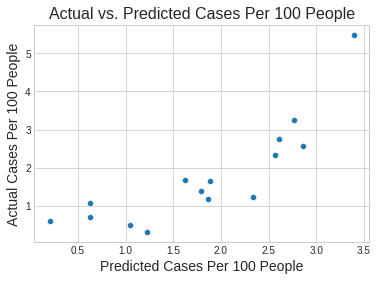

In [70]:
# Plot the predicted sale price versus the actual 'cases_per_100_people'
plt.figure(figsize=(6,4))
sns.scatterplot(y_preds, y_test)
plt.title('Actual vs. Predicted Cases Per 100 People', fontsize=16)
plt.xlabel('Predicted Cases Per 100 People', fontsize=14)
plt.ylabel('Actual Cases Per 100 People', fontsize=14);

In [71]:
# Extract a boolean matrix of features selectkbest used in the best model.
features = gs.best_estimator_.named_steps['selectkbest'].get_support()
features

array([ True,  True,  True,  True,  True,  True,  True, False,  True,
       False, False,  True,  True,  True,  True,  True,  True,  True,
       False])

In [72]:
features = X_train.columns[features==True]

In [73]:
features

Index(['percent_race_pop_hispanic_or_latino_of_any_race',
       'percent_sex_age_pop_under_5', 'percent_sex_age_pop_5_to_9',
       'percent_sex_age_pop_10_to_14', 'percent_sex_age_pop_15_to_19',
       'obes_percent', 'percent_sex_age_pop_25_to_34', 'sex_age_pop_20_to_24',
       'tests_per_100_people', 'percent_sex_age_pop_35_to_44',
       'percent_race_pop_white_alone', 'percent_sex_age_pop_45_to_74',
       'percent_sex_age_pop_75_and_over', 'percent_race_pop_two_or_more_races',
       'inc_per_capita_inc_dol'],
      dtype='object')

In [74]:
# Extract the coefficients for the features used in the best model.
coefs = gs.best_estimator_.named_steps['ridge'].coef_

In [75]:
coefs.shape

(15,)

In [76]:
coefs

array([ 0.50169769,  0.31870195,  0.31296203,  0.45933941, -0.1805425 ,
       -0.11199446,  0.12448592,  0.39614919,  0.85401913, -0.38059114,
       -0.61358013, -0.68024461,  0.02999153, -0.88918687, -0.47513588])

In [77]:
coef_df = pd.DataFrame(list(zip(features, coefs)), columns=['Feature', 'cases_per_100_people'])
coef_df = coef_df.set_index('Feature')
coef_df = coef_df.sort_values(by='cases_per_100_people', ascending=False)

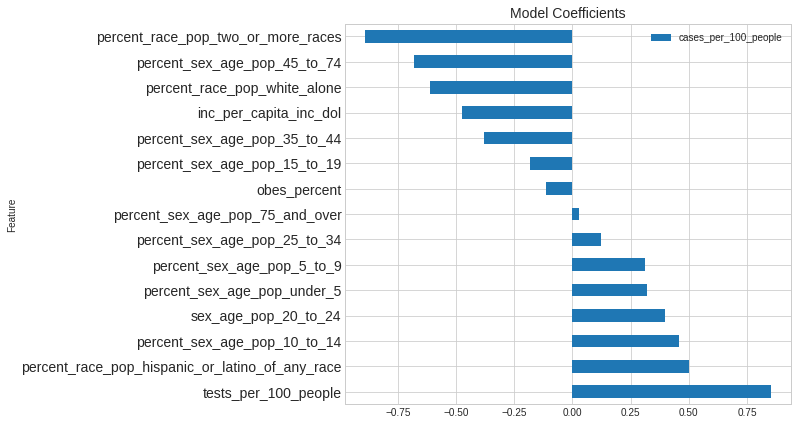

In [78]:
# Plot the datatframe of the top 10 word and their coefficients.
coef_df.plot(kind = 'barh', figsize=(8,7))
plt.title('Model Coefficients', fontsize=14)
plt.yticks(fontsize=14);

## Model: GridSearchCV with Classifier

In [117]:
# Assign our features to X.
X = df[[
    'percent_race_pop_hispanic_or_latino_of_any_race',
    'percent_sex_age_pop_under_5',
    'percent_sex_age_pop_5_to_9',
    'percent_sex_age_pop_10_to_14',
    'percent_sex_age_pop_15_to_19',
    'obes_percent',
    'percent_race_pop_white_alone',
    'percent_sex_age_pop_45_to_74',
    'percent_sex_age_pop_75_and_over',
    'inc_per_capita_inc_dol'
]]

y = df['covid_severity']

# Split X and y into train/test groups.
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [118]:
# Display the shape of the training data.
X_train.shape

(43, 10)

In [119]:
# Create a main pipeline that will contain the dtype pipelines and the estimator.
pipe = make_pipeline(StandardScaler(), SelectKBest(), LogisticRegression())

# Set parameters for GridSearchCV.
params = {
    'selectkbest__k': range(1,300),
    'logisticregression__C': [.1, .5, 1, 10]
}

# Set up GridSearchCV with the pipe and R2 as the scoring method.
gs = GridSearchCV(pipe, param_grid=params, cv=10, n_jobs=-1)

In [120]:
# Call fit on the GridSearchCV object and pass the training  data.
gs.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('selectkbest', SelectKBest()),
                                       ('logisticregression',
                                        LogisticRegression())]),
             n_jobs=-1,
             param_grid={'logisticregression__C': [0.1, 0.5, 1, 10],
                         'selectkbest__k': range(1, 300)})

In [121]:
# Display the best parameters.
gs.best_params_

{'logisticregression__C': 0.5, 'selectkbest__k': 4}

In [54]:
# Display the score for the test set.
gs.score(X_test, y_test)

0.9333333333333333

In [55]:
# Display the score for the train set.
gs.score(X_train, y_train)

0.9302325581395349

In [56]:
y_preds = gs.predict(X_test)

In [57]:
from sklearn.metrics import mean_squared_error, recall_score, confusion_matrix, plot_confusion_matrix, plot_roc_curve, f1_score, accuracy_score

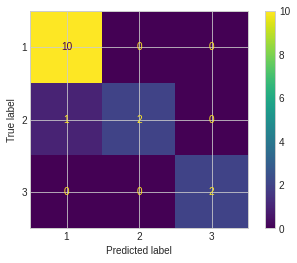

In [58]:
# Plot the predicted sale price versus the actual sale price
plot_confusion_matrix(gs, X_test, y_test);

In [59]:
accuracy_score(y_test, y_preds)

0.9333333333333333

In [60]:
# Extract a boolean matrix of features selectkbest used in the best model.
features = gs.best_estimator_.named_steps['selectkbest'].get_support()
features

array([ True,  True, False,  True, False, False, False,  True, False,
       False])

In [61]:
features = X_train.columns[features==True]

In [62]:
features

Index(['percent_race_pop_hispanic_or_latino_of_any_race',
       'percent_sex_age_pop_under_5', 'percent_sex_age_pop_10_to_14',
       'percent_sex_age_pop_45_to_74'],
      dtype='object')

In [63]:
# Extract the coefficients for the features used in the best model.
coefs = gs.best_estimator_.named_steps['logisticregression'].coef_

In [64]:
coefs.shape

(3, 4)

In [65]:
coefs

array([[-0.96219975, -0.28153929, -0.39437644,  0.77245983],
       [ 0.38982899, -0.43497166,  0.00870767, -0.2629217 ],
       [ 0.57237076,  0.71651095,  0.38566877, -0.50953813]])

In [74]:
coefs[0]

array([-0.96219975, -0.28153929, -0.39437644,  0.77245983])

In [75]:
coefs[1]

array([ 0.38982899, -0.43497166,  0.00870767, -0.2629217 ])

In [76]:
coefs[2]

array([ 0.57237076,  0.71651095,  0.38566877, -0.50953813])

In [67]:
coef1 = coefs[0]
coef2 = coefs[1]
coef3 = coefs[2]

In [78]:
pd.DataFrame(list(zip(features, coef1)), columns=['Feature', 'covid_severity_1'])

Feature  covid_severity_1
0  percent_race_pop_hispanic_or_latino_of_any_race         -0.962200
1                      percent_sex_age_pop_under_5         -0.281539
2                     percent_sex_age_pop_10_to_14         -0.394376
3                     percent_sex_age_pop_45_to_74          0.772460

In [79]:
pd.DataFrame(list(zip(features, coef2)), columns=['Feature', 'covid_severity_2'])

Feature  covid_severity_2
0  percent_race_pop_hispanic_or_latino_of_any_race          0.389829
1                      percent_sex_age_pop_under_5         -0.434972
2                     percent_sex_age_pop_10_to_14          0.008708
3                     percent_sex_age_pop_45_to_74         -0.262922

In [80]:
pd.DataFrame(list(zip(features, coef3)), columns=['Feature', 'covid_severity_3'])

Feature  covid_severity_3
0  percent_race_pop_hispanic_or_latino_of_any_race          0.572371
1                      percent_sex_age_pop_under_5          0.716511
2                     percent_sex_age_pop_10_to_14          0.385669
3                     percent_sex_age_pop_45_to_74         -0.509538